In [78]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats  as stats
import numpy as np
from sklearn.linear_model import LinearRegression
import json

In [79]:
#reading csv file to dataframe
data_source = 'http://www3.cs.stonybrook.edu/~skiena/519/hw1/country-data.csv'
df = pd.read_csv(data_source)
df

,Country Name,Country Code,Government Type,Capital City,Date of Founding/Independence,Latitude of Capital,Longitude of Capital,Population,Life Expectancy,GDP (PPP) in US $,...,Land Boundaries (km),Coastline (km),Literacy Rate (%),Health Expenditure/GDP,Military Expenditure/GDP,Renewable Water Resources (cu km),Net Migration Rate/1000 Population,Labor Force,Internet Users (circa 2009),Commercial Prime Lending Rate
0,Afghanistan,AF,Islamic republic,Kabul,8/19/1919,34 31 N,69 11 E,31822848,50.49,45300000000,...,5987.0,0.0,28.1,9.6,4.74,65.33,-1.83,7512000,1000000,15
1,Albania,AL,parliamentary democracy,Tirana,11/28/1912,41 19 N,19 49 E,3020209,77.96,28340000000,...,691.0,362.0,96.8,6.3,1.47,41.7,-3.31,1098000,1300000,9.52
2,Algeria,DZ,republic,Algiers,7/5/1962,36 45 N,3 03 E,38813722,76.39,284700000000,...,6734.0,998.0,72.6,3.9,4.48,11.67,-0.93,11150000,4700000,8
3,Andorra,AD,parliamentary democracy,Andorra la Vella,1278,42 30 N,1 31 E,85458,82.65,3163000000,...,118.0,0.0,100,7.2,unknown,unknown,0,36060,67100,unknown
4,Angola,AO,republic,Luanda,11/11/1975,8 50 S,13 13 E,19088106,55.29,131800000000,...,5369.0,1600.0,70.4,3.5,3.63,148,0.47,9018000,606700,15
5,Antigua and Barbuda,AG,constitutional monarchy,Saint John's,11/1/1981,17 07 N,61 51 W,91295,76.12,1610000000,...,0.0,153.0,99,5.9,unknown,0.05,2.23,30000,65000,10.3
6,Argentina,AR,republic,Buenos Aires,7/9/1816,34 35 S,58 40 W,43024374,77.51,771000000000,...,11968.0,4989.0,97.9,8.1,0.91,814,0,17320000,13694000,16.4
7,Armenia,AM,republic,Yerevan,9/21/1991,40 10 N,44 30 E,3060631,74.12,20610000000,...,1570.0,0.0,99.6,4.3,3.92,7.77,-5.88,1394000,208200,16.5
8,Australia,AU,federal parliamentary democracy,Canberra,1/1/1901,35 16 S,149 08 E,22507617,82.07,998300000000,...,0.0,25760.0,99,9,1.71,492,5.74,12440000,15810000,6.2
9,Austria,AT,federal republic,Vienna,11/12/1918,48 12 N,16 22 E,8223062,80.17,361000000000,...,2524.0,0.0,98,10.6,0.81,77.7,1.76,3737000,6143000,2.2


In [82]:
#The csv file contains value 1.78% in one cell of Militray Expenditure whereas rest of the column values of 
#Military Expenditure are in not in percentage values. hence dropping the percentage value
if(df['Military Expenditure/GDP'][140]=='1.78%'):
    df['Military Expenditure/GDP'][140]=1.78

In [83]:
df['Military Expenditure/GDP'][140]

1.78

In [84]:
#replace unknown values with NaN values
df_nan=df.replace(to_replace='unknown',value='NaN')
#df_nan.dtypes

# Task 1 : Informative plots

In [85]:
# taking parameters to visualise them
df_Task1=df_nan[['GDP (PPP) in US $','Life Expectancy','Coastline (km)', 'Literacy Rate (%)',
                 'Health Expenditure/GDP', 'Military Expenditure/GDP', 'Renewable Water Resources (cu km)',
                 'Net Migration Rate/1000 Population', 'Labor Force', 'Internet Users (circa 2009)', 'Commercial Prime Lending Rate']]
df_Task1=df_Task1.astype(float)
#dropping missing values
df_Task1=df_Task1.dropna()

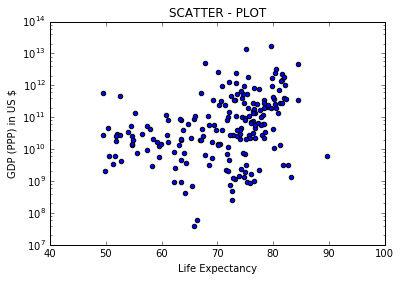

In [86]:
df_nan.plot(kind='scatter',x='Life Expectancy',y='GDP (PPP) in US $',logy=1,title='SCATTER - PLOT')

##### The scatter plot between Life Expectancy and GDP shows some good positive correlation. It seems as if these are directly proportional to each other which seems fine as we can expect higher life expectancy with higher GDP

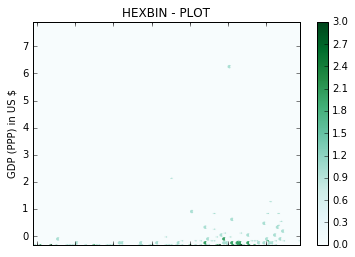

In [87]:
#Scaling GDP so that when it matches with the scale of Life Expectancy in hexbin 
df_Task1['GDP (PPP) in US $']=(df_Task1['GDP (PPP) in US $'] - df_Task1['GDP (PPP) in US $'].mean())/df_Task1['GDP (PPP) in US $'].std(ddof=0)
df_Task1.plot(kind='hexbin',x='Life Expectancy',y='GDP (PPP) in US $',title='HEXBIN - PLOT')

##### Taking the normalised values for GDP and plotting the life expectancy against it in hexbin.Took normalised GDP so that it can match the scale of Life expectancy

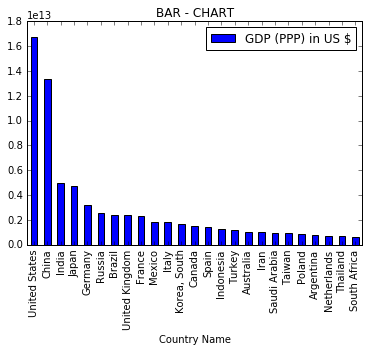

In [88]:
df_pair1=df_nan[['GDP (PPP) in US $','Country Name']]
df_pair1=df_pair1.sort_values(by='GDP (PPP) in US $',axis=0,ascending=False)
df_pair1=df_pair1.head(25)
df_pair1.plot(kind='bar',x='Country Name',y='GDP (PPP) in US $',title='BAR - CHART')

##### The above bar chart depicts the GDP sorted among countries. We can find out how fast it's falling among the countries.

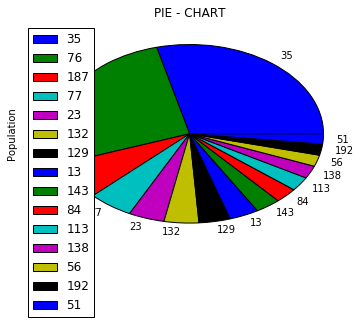

In [89]:
df_pair2=df_nan[['Population','Country Name']]
df_pair2=df_pair2.sort_values(by='Population',axis=0,ascending=False)
df_pair2=df_pair2.head(15)
df_pair2.plot(kind='pie',x='Country Name',y='Population',title='PIE - CHART')

##### The pie chart above shows the distribution of population occupied by countries. We can find out, which countries are similiar in terms of population. China and India are almost similar in terms of population.

In [90]:
df_pair2.head(10)

,Population,Country Name
35,1355692576,China
76,1236344631,India
187,318892103,United States
77,253609643,Indonesia
23,202656788,Brazil
132,196174380,Pakistan
129,177155754,Nigeria
13,166280712,Bangladesh
143,142470272,Russia
84,127103388,Japan


# Task 2 : Pearson Correlation analysis | Permutation Test

###### Selecting valid pairs from data frame 

In [91]:

df_small=df_nan[['Country Name','GDP (PPP) in US $','Population','Life Expectancy',
                 'Area (sq km)', 'Land Boundaries (km)', 'Coastline (km)', 'Literacy Rate (%)', 'Health Expenditure/GDP', 'Military Expenditure/GDP', 'Renewable Water Resources (cu km)', 'Net Migration Rate/1000 Population', 'Labor Force', 'Internet Users (circa 2009)', 'Commercial Prime Lending Rate']]
#df_small.head(100)

In [92]:
#df_small.dtypes

In [93]:
df_similarity=df_small[['Country Name','Population','Life Expectancy','Literacy Rate (%)','GDP (PPP) in US $','Area (sq km)','Coastline (km)','Health Expenditure/GDP','Renewable Water Resources (cu km)','Net Migration Rate/1000 Population','Labor Force','Internet Users (circa 2009)']]
#df_similarity

In [94]:
#deleting column 'Country name' so that df can be converted to float data type
del df_small['Country Name']
#converting to type float so that correlation matrix can be computed
df_float=df_small.astype(float)
#displaying the dtypes to confirm if the data types are converted to float
#df_float.dtypes

In [95]:
# filling the NaN values with mean of the particular column
df_float.fillna(df_float.mean(),inplace=True)

,GDP (PPP) in US $,Population,Life Expectancy,Area (sq km),Land Boundaries (km),Coastline (km),Literacy Rate (%),Health Expenditure/GDP,Military Expenditure/GDP,Renewable Water Resources (cu km),Net Migration Rate/1000 Population,Labor Force,Internet Users (circa 2009),Commercial Prime Lending Rate
0,4.530000e+10,31822848.0,50.49,652230.0,5987.0,0.0,28.100000,9.600000,4.740000,65.330000,-1.830000,7512000.0,1.000000e+06,15.000000
1,2.834000e+10,3020209.0,77.96,28748.0,691.0,362.0,96.800000,6.300000,1.470000,41.700000,-3.310000,1098000.0,1.300000e+06,9.520000
2,2.847000e+11,38813722.0,76.39,2381741.0,6734.0,998.0,72.600000,3.900000,4.480000,11.670000,-0.930000,11150000.0,4.700000e+06,8.000000
3,3.163000e+09,85458.0,82.65,468.0,118.0,0.0,100.000000,7.200000,1.934429,313.004651,0.000000,36060.0,6.710000e+04,11.113735
4,1.318000e+11,19088106.0,55.29,1246700.0,5369.0,1600.0,70.400000,3.500000,3.630000,148.000000,0.470000,9018000.0,6.067000e+05,15.000000
5,1.610000e+09,91295.0,76.12,442.6,0.0,153.0,99.000000,5.900000,1.934429,0.050000,2.230000,30000.0,6.500000e+04,10.300000
6,7.710000e+11,43024374.0,77.51,2780400.0,11968.0,4989.0,97.900000,8.100000,0.910000,814.000000,0.000000,17320000.0,1.369400e+07,16.400000
7,2.061000e+10,3060631.0,74.12,29743.0,1570.0,0.0,99.600000,4.300000,3.920000,7.770000,-5.880000,1394000.0,2.082000e+05,16.500000
8,9.983000e+11,22507617.0,82.07,7741220.0,0.0,25760.0,99.000000,9.000000,1.710000,492.000000,5.740000,12440000.0,1.581000e+07,6.200000
9,3.610000e+11,8223062.0,80.17,83871.0,2524.0,0.0,98.000000,10.600000,0.810000,77.700000,1.760000,3737000.0,6.143000e+06,2.200000


In [96]:
#calculating correlation values on valid pairs
df_corr=df_float.corr(method='pearson')
df_corr

,GDP (PPP) in US $,Population,Life Expectancy,Area (sq km),Land Boundaries (km),Coastline (km),Literacy Rate (%),Health Expenditure/GDP,Military Expenditure/GDP,Renewable Water Resources (cu km),Net Migration Rate/1000 Population,Labor Force,Internet Users (circa 2009),Commercial Prime Lending Rate
GDP (PPP) in US $,1.000000,0.697280,0.175071,0.592445,0.500468,0.204414,0.124443,0.193906,0.101398,0.472084,0.033252,0.729767,0.938708,-0.183466
Population,0.697280,1.000000,0.014249,0.453228,0.575146,0.120474,-0.042841,-0.070342,0.032563,0.428147,0.004437,0.980173,0.761488,-0.048634
Life Expectancy,0.175071,0.014249,1.000000,0.033022,-0.219494,0.162933,0.723925,0.117537,-0.053976,0.074657,0.132196,0.032018,0.151821,-0.441829
Area (sq km),0.592445,0.453228,0.033022,1.000000,0.749098,0.521336,0.051362,0.064267,0.139689,0.753144,0.038319,0.476994,0.565220,-0.031600
Land Boundaries (km),0.500468,0.575146,-0.219494,0.749098,1.000000,0.195977,-0.148470,-0.110463,0.136960,0.649353,0.001736,0.581353,0.527210,0.132190
Coastline (km),0.204414,0.120474,0.162933,0.521336,0.195977,1.000000,0.134779,0.108460,-0.038895,0.375393,0.041033,0.123811,0.175513,-0.140495
Literacy Rate (%),0.124443,-0.042841,0.723925,0.051362,-0.148470,0.134779,1.000000,0.120436,-0.094382,0.078604,0.046967,-0.010860,0.115658,-0.326571
Health Expenditure/GDP,0.193906,-0.070342,0.117537,0.064267,-0.110463,0.108460,0.120436,1.000000,-0.130757,0.055628,0.001128,-0.055996,0.139570,-0.115620
Military Expenditure/GDP,0.101398,0.032563,-0.053976,0.139689,0.136960,-0.038895,-0.094382,-0.130757,1.000000,0.030380,0.145858,0.030905,0.070635,-0.041730
Renewable Water Resources (cu km),0.472084,0.428147,0.074657,0.753144,0.649353,0.375393,0.078604,0.055628,0.030380,1.000000,0.004280,0.439960,0.477802,0.112432


In [97]:
#to find max correlation value, replacing 1.0(1.0 refers to one's r value with itself) with 0 and applying max function 
df_max=df_corr.replace(to_replace=1.0,value=0)
df_max.max()

GDP (PPP) in US $                     0.938708
Population                            0.980173
Life Expectancy                       0.723925
Area (sq km)                          0.753144
Land Boundaries (km)                  0.749098
Coastline (km)                        0.521336
Literacy Rate (%)                     0.723925
Health Expenditure/GDP                0.193906
Military Expenditure/GDP              0.145858
Renewable Water Resources (cu km)     0.753144
Net Migration Rate/1000 Population    0.145858
Labor Force                           0.980173
Internet Users (circa 2009)           0.938708
Commercial Prime Lending Rate         0.132190
dtype: float64

In [98]:
df_max.min()

GDP (PPP) in US $                    -0.183466
Population                           -0.070342
Life Expectancy                      -0.441829
Area (sq km)                         -0.031600
Land Boundaries (km)                 -0.219494
Coastline (km)                       -0.140495
Literacy Rate (%)                    -0.326571
Health Expenditure/GDP               -0.130757
Military Expenditure/GDP             -0.130757
Renewable Water Resources (cu km)     0.000000
Net Migration Rate/1000 Population   -0.087926
Labor Force                          -0.058612
Internet Users (circa 2009)          -0.154049
Commercial Prime Lending Rate        -0.441829
dtype: float64

###### Found out from the above that Population and Labor Force have max +ve correlation.
###### Also found out that the most -ve correlation is between Life Expectancy and Commercial Prime Lending Rate

In [99]:
#Found out from the above that Population and Labor Force have max +ve correlation;Creating DF for these two
#Also found out that the most -ve correlation is between Life Expectancy and Commercial Prime Lending Rate
df_maxCorr=df_float[['Population','Labor Force']]
df_maxNegativeCorr=df_float[['Life Expectancy','Commercial Prime Lending Rate']]

In [100]:
df_maxCorr.corr(method='pearson')

,Population,Labor Force
Population,1.000000,0.980173
Labor Force,0.980173,1.000000


In [101]:
df_maxNegativeCorr.corr(method='pearson')

,Life Expectancy,Commercial Prime Lending Rate
Life Expectancy,1.000000,-0.441829
Commercial Prime Lending Rate,-0.441829,1.000000


In [102]:
df_maxCorr

,Population,Labor Force
0,31822848.0,7512000.0
1,3020209.0,1098000.0
2,38813722.0,11150000.0
3,85458.0,36060.0
4,19088106.0,9018000.0
5,91295.0,30000.0
6,43024374.0,17320000.0
7,3060631.0,1394000.0
8,22507617.0,12440000.0
9,8223062.0,3737000.0


##### Generating permutation tests for (Population,Labor Force),that has maximum positive correlation ,to determine the significance of r-value found from the actual data set.
Generating random values for column 'Labor Force' for 1000 times and finding the r value of each randomly-generated column. 

In [103]:
#Generating permutation tests function for max positive correlation values
#generating random values for 'Labor force' column ; merging all random combinations in existing DF
no_permutations=1000
for num in range(1,no_permutations):
    iterator=df_maxCorr['Labor Force'].count()
    random=df_maxCorr['Labor Force'].sample(n=iterator)
    col_heading='Labor Force Perm#'+str(num)
    df_perm1=pd.DataFrame({col_heading:random.values}) 
    df_maxCorr=pd.concat([df_maxCorr,df_perm1],axis=1) #merging permuted column in original DF
    

In [104]:
df_maxCorr

,Population,Labor Force,Labor Force Perm#1,Labor Force Perm#2,Labor Force Perm#3,Labor Force Perm#4,Labor Force Perm#5,Labor Force Perm#6,Labor Force Perm#7,Labor Force Perm#8,...,Labor Force Perm#990,Labor Force Perm#991,Labor Force Perm#992,Labor Force Perm#993,Labor Force Perm#994,Labor Force Perm#995,Labor Force Perm#996,Labor Force Perm#997,Labor Force Perm#998,Labor Force Perm#999
0,31822848.0,7512000.0,39380000.0,8.412000e+06,3.583000e+04,3.431000e+07,3447000.0,1424000.0,1.452000e+06,3.431000e+07,...,1.244000e+07,1.452000e+06,2795000.0,2.025000e+05,4.182000e+05,25000.0,1.699000e+07,5409000.0,2222000.0,59210000.0
1,3020209.0,1098000.0,205800.0,3.606000e+04,1.372000e+06,1.115000e+07,30150000.0,3939000.0,5.233000e+06,8.900000e+06,...,1.700000e+06,6.275000e+06,41330000.0,6.210000e+05,2.769000e+07,2795000.0,2.574000e+07,1037000.0,913400.0,25740000.0
2,38813722.0,11150000.0,34310000.0,2.772000e+07,1.440000e+05,3.956000e+04,195200.0,336400.0,1.952000e+05,1.244000e+07,...,8.367000e+06,2.574000e+07,1490000.0,2.890000e+06,4.077000e+06,205800.0,8.742000e+05,913400.0,75290000.0,3373000.0
3,85458.0,36060.0,3241000.0,1.490000e+06,1.817000e+04,3.974000e+06,34310000.0,7512000.0,3.190000e+06,5.249000e+04,...,2.025000e+05,1.319000e+07,692900.0,7.928000e+06,2.344000e+06,11150000.0,1.440000e+05,4446000.0,4912000.0,1898000.0
4,19088106.0,9018000.0,4263000.0,2.769000e+07,8.000000e+05,9.777000e+03,487300000.0,35830.0,1.540000e+06,4.918000e+06,...,1.715000e+06,8.000000e+05,3662000.0,4.918000e+06,3.241000e+06,9777.0,1.811000e+05,4912000.0,2082000.0,75290000.0
5,91295.0,30000.0,59210000.0,2.222000e+06,1.904000e+05,8.804000e+05,57520.0,2344000.0,9.451000e+06,2.513000e+05,...,1.394000e+06,1.904000e+05,3974000.0,4.588000e+06,2.707000e+06,196100.0,7.100000e+06,3737000.0,9451000.0,4245000.0
6,43024374.0,17320000.0,44200000.0,2.196000e+04,4.588000e+06,5.921000e+07,4263000.0,692900.0,1.372000e+06,3.039000e+06,...,4.446000e+06,9.134000e+05,19080000.0,9.451000e+06,3.000000e+04,27720000.0,5.752000e+04,3447000.0,25860000.0,716500.0
7,3060631.0,1394000.0,59900.0,2.574000e+07,1.394000e+06,1.969000e+05,6668000.0,8900000.0,1.260000e+07,2.769000e+07,...,1.481000e+06,1.115000e+07,59900.0,4.420000e+07,3.447000e+06,7928000.0,5.990000e+04,637600.0,1022000.0,8528000.0
8,22507617.0,12440000.0,9504000.0,1.394000e+06,4.077000e+06,2.551000e+06,336400.0,159700.0,5.249000e+04,2.559000e+07,...,2.769000e+07,3.493000e+06,22170000.0,7.529000e+07,6.953000e+06,78620000.0,4.565000e+07,2890000.0,3447000.0,2955000.0
9,8223062.0,3737000.0,78620000.0,7.900000e+06,1.260000e+07,7.870000e+03,2738000.0,4922000.0,2.222000e+06,4.680000e+06,...,3.000000e+04,3.606000e+04,443500.0,1.967000e+07,5.000000e+06,1098000.0,3.350000e+05,21960.0,2707000.0,11550000.0


In [105]:
df_Ptest_rValues=df_maxCorr.loc[[0]]
for column in df_maxCorr:
    df_Ptest_rValues[column][0]=df_maxCorr['Population'].corr(df_maxCorr[column],method='pearson')
    #df_Ptest_rValues[column][0]=r
df_Ptest_rValues

,Population,Labor Force,Labor Force Perm#1,Labor Force Perm#2,Labor Force Perm#3,Labor Force Perm#4,Labor Force Perm#5,Labor Force Perm#6,Labor Force Perm#7,Labor Force Perm#8,...,Labor Force Perm#990,Labor Force Perm#991,Labor Force Perm#992,Labor Force Perm#993,Labor Force Perm#994,Labor Force Perm#995,Labor Force Perm#996,Labor Force Perm#997,Labor Force Perm#998,Labor Force Perm#999
0,1.0,0.980173,-0.012563,0.075654,0.003769,-0.01091,0.001214,0.017709,-0.037167,-0.005355,...,0.008606,-0.021497,0.088441,-0.02964,-0.010113,-0.025011,-0.009433,-0.033844,-0.033594,-0.026225


In [106]:
#Calculating p value
actual_R=df_Ptest_rValues['Labor Force'][0]

In [107]:
del df_Ptest_rValues['Population']
df_Ptest_rValues

,Labor Force,Labor Force Perm#1,Labor Force Perm#2,Labor Force Perm#3,Labor Force Perm#4,Labor Force Perm#5,Labor Force Perm#6,Labor Force Perm#7,Labor Force Perm#8,Labor Force Perm#9,...,Labor Force Perm#990,Labor Force Perm#991,Labor Force Perm#992,Labor Force Perm#993,Labor Force Perm#994,Labor Force Perm#995,Labor Force Perm#996,Labor Force Perm#997,Labor Force Perm#998,Labor Force Perm#999
0,0.980173,-0.012563,0.075654,0.003769,-0.01091,0.001214,0.017709,-0.037167,-0.005355,-0.014102,...,0.008606,-0.021497,0.088441,-0.02964,-0.010113,-0.025011,-0.009433,-0.033844,-0.033594,-0.026225


In [108]:
numerator=0
for column in df_Ptest_rValues:
    if(df_Ptest_rValues[column][0]>=actual_R):
        numerator=numerator+1
print ('R value from actual dataset =',actual_R)
print ('Number of permutation sets that have r value above r value of actual dataset =',numerator)

R value from actual dataset = 0.980172630031
Number of permutation sets that have r value above r value of actual dataset = 1


In [109]:
pValue=numerator/no_permutations
print ('P-value of most positive correlated variables=',pValue)

P-value of most positive correlated variables= 0.001


###### Found out that the P-value of most positive correlated varaibles= 0.001

In [110]:
df_maxNegativeCorr.corr(method='pearson')

,Life Expectancy,Commercial Prime Lending Rate
Life Expectancy,1.000000,-0.441829
Commercial Prime Lending Rate,-0.441829,1.000000


In [111]:
df_maxNegativeCorr

,Life Expectancy,Commercial Prime Lending Rate
0,50.49,15.000000
1,77.96,9.520000
2,76.39,8.000000
3,82.65,11.113735
4,55.29,15.000000
5,76.12,10.300000
6,77.51,16.400000
7,74.12,16.500000
8,82.07,6.200000
9,80.17,2.200000


##### Generating permutation tests for (Life Expectancy,Commercial Prime Lending Rate),that has maximum negative correlation ,to determine the significance of r-value found from the actual data set.
Generating random values for column 'Commercial Prime Lending Rate' for 1000 times and finding the r value of each randomly-generated column. 

In [112]:
#Generating permutation tests function
#generating random values for 'Labor force' column ; merging all random combinations in existing DF
no_permutations=1000
for num in range(1,no_permutations):
    iterator=df_maxNegativeCorr['Commercial Prime Lending Rate'].count()
    random=df_maxNegativeCorr['Commercial Prime Lending Rate'].sample(n=iterator)
    col_heading='CPLR Perm#'+str(num)
    df_perm1=pd.DataFrame({col_heading:random.values}) 
    df_maxNegativeCorr=pd.concat([df_maxNegativeCorr,df_perm1],axis=1) #merging permuted column in original DF

In [113]:
#df_maxNegativeCorr.corr(method='pearson')

In [114]:
# df_Ptest_rNegative=df_maxNegativeCorr.loc[[0]]
# df_Ptest_rNegative=df_maxNegativeCorr.loc[[0]]

In [115]:
df_Ptest_rNegative=df_maxNegativeCorr.loc[[0]]
for column in df_maxNegativeCorr:
    df_Ptest_rNegative[column][0]=df_maxNegativeCorr['Life Expectancy'].corr(df_maxNegativeCorr[column],method='pearson')
df_Ptest_rNegative

,Life Expectancy,Commercial Prime Lending Rate,CPLR Perm#1,CPLR Perm#2,CPLR Perm#3,CPLR Perm#4,CPLR Perm#5,CPLR Perm#6,CPLR Perm#7,CPLR Perm#8,...,CPLR Perm#990,CPLR Perm#991,CPLR Perm#992,CPLR Perm#993,CPLR Perm#994,CPLR Perm#995,CPLR Perm#996,CPLR Perm#997,CPLR Perm#998,CPLR Perm#999
0,1.0,-0.441829,0.116534,-0.058134,-0.023531,0.02536,-0.055028,0.103944,-0.009877,-0.054251,...,0.016918,-0.028542,0.039994,0.008744,0.028753,0.077522,0.093653,-0.11406,-0.044145,-0.097453


In [116]:
#Calculating p value
actual_R_Neg=df_Ptest_rNegative['Commercial Prime Lending Rate'][0]
del df_Ptest_rNegative['Life Expectancy']
#del df_Ptest_rValues['Labor Force']
df_Ptest_rNegative

,Commercial Prime Lending Rate,CPLR Perm#1,CPLR Perm#2,CPLR Perm#3,CPLR Perm#4,CPLR Perm#5,CPLR Perm#6,CPLR Perm#7,CPLR Perm#8,CPLR Perm#9,...,CPLR Perm#990,CPLR Perm#991,CPLR Perm#992,CPLR Perm#993,CPLR Perm#994,CPLR Perm#995,CPLR Perm#996,CPLR Perm#997,CPLR Perm#998,CPLR Perm#999
0,-0.441829,0.116534,-0.058134,-0.023531,0.02536,-0.055028,0.103944,-0.009877,-0.054251,-0.062335,...,0.016918,-0.028542,0.039994,0.008744,0.028753,0.077522,0.093653,-0.11406,-0.044145,-0.097453


In [117]:
numerator=0
for column in df_Ptest_rNegative:
    if(df_Ptest_rNegative[column][0]<=actual_R_Neg):
        numerator=numerator+1
print ('R value from actual dataset =',actual_R_Neg)
print ('Number of permutation sets that have r value above r value of actual dataset',numerator)
pValue=numerator/no_permutations
print ('P-value of most negative correlated varaibles=',pValue)

R value from actual dataset = -0.441828547965
Number of permutation sets that have r value above r value of actual dataset 1
P-value of most negative correlated varaibles= 0.001


######  From the permutation tests, found that P-value of most negative correlated varaibles= 0.001. Since, this value is so small, it refers that the r-value we got from the actual data set for variables - Commercial Prime Lending Rate and Life Expectancy - is significant and not happened by some chance.Similar is the case with the variables having the most +ve correlation value.

# Task 3 : Simple linear regression model to predict the average income (GDP per capita) as a function of other individual variables

In [118]:
#converting to smaller data frame with non-string values
df_Task3=df_nan[['GDP (PPP) in US $','Population','Life Expectancy','Area (sq km)', 'Land Boundaries (km)', 'Coastline (km)', 'Literacy Rate (%)', 'Health Expenditure/GDP', 'Military Expenditure/GDP', 'Renewable Water Resources (cu km)', 'Net Migration Rate/1000 Population', 'Labor Force', 'Internet Users (circa 2009)', 'Commercial Prime Lending Rate']]
df_Task3=df_Task3.astype(float)
#calculating GDP per capita ; dividing GDP by Population ; appending new column'GDPperCapita' in existing DF
df_Task3['GDPperCapita']=df_Task3['GDP (PPP) in US $']/df_Task3['Population']


In [119]:
def callLinearRegression(variable):
    pair=df_Task3[['GDPperCapita',variable]]
    pair=pair.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
    
    pair['GDPperCapitaZ-score'] = (pair['GDPperCapita'] - pair['GDPperCapita'].mean())/pair['GDPperCapita'].std(ddof=0)
    pair['VariableZ-score'] = (pair[variable] - pair[variable].mean())/pair[variable].std(ddof=0)
    
    Y=pair[['GDPperCapitaZ-score']].values
    X=pair[['VariableZ-score']].values
    model = LinearRegression()
    model = model.fit(X, Y)
    predictions = model.predict(X)
    
    #Prinitng slope and intercept values found for minimum squared error values
    print("Slope = {}, Bias = {}".format(model.coef_[0], model.intercept_))
    print("Residual sum of squares: %.2f" % np.mean((predictions - Y) ** 2))
    print('R^2: %.2f' % model.score(X, Y))
    
    #Plotting scatter plots for regression models 
    plt.scatter(X, Y,  color='y')
    plt.plot(X, predictions, color='black', linewidth=3)
    plt.xlabel(variable, fontsize=15)
    plt.ylabel('GDP per Capita', fontsize=15)
   

Slope = [-0.17492993], Bias = [  6.67210399e-17]
Residual sum of squares: 0.97
R^2: 0.03


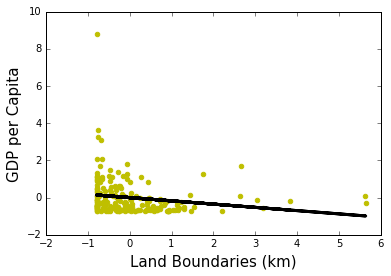

In [120]:
callLinearRegression('Land Boundaries (km)')

Slope = [-0.05206478], Bias = [  5.31632984e-17]
Residual sum of squares: 1.00
R^2: 0.00


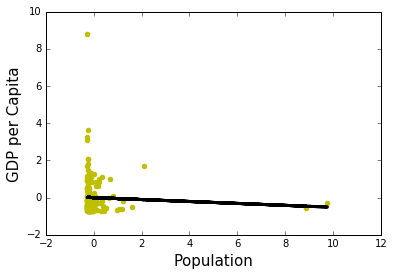

In [121]:
callLinearRegression('Population')

Slope = [ 0.57531385], Bias = [ -7.64246056e-16]
Residual sum of squares: 0.67
R^2: 0.33


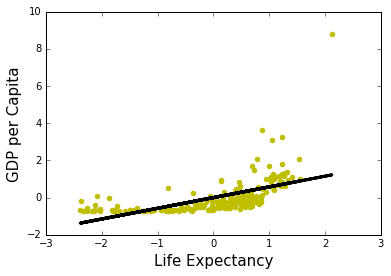

In [122]:
callLinearRegression('Life Expectancy')

Slope = [ 0.04661223], Bias = [  5.20007171e-17]
Residual sum of squares: 1.00
R^2: 0.00


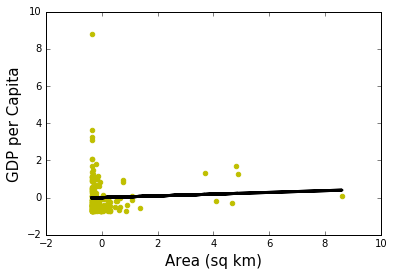

In [123]:
callLinearRegression('Area (sq km)')

Slope = [-0.17492993], Bias = [  6.67210399e-17]
Residual sum of squares: 0.97
R^2: 0.03


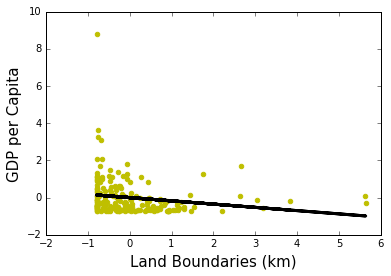

In [124]:
callLinearRegression('Land Boundaries (km)')

Slope = [ 0.13355548], Bias = [  5.65107889e-17]
Residual sum of squares: 0.98
R^2: 0.02


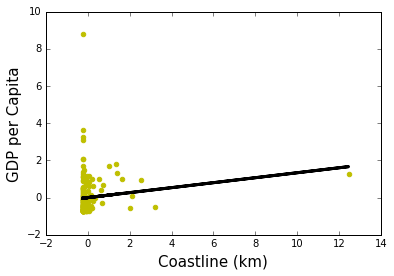

In [125]:
callLinearRegression('Coastline (km)')

Slope = [ 0.42482269], Bias = [  2.61173714e-16]
Residual sum of squares: 0.82
R^2: 0.18


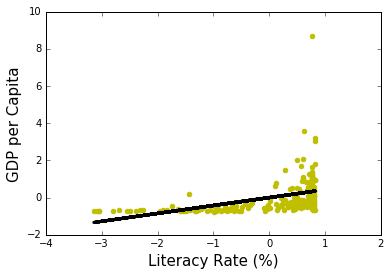

In [126]:
callLinearRegression('Literacy Rate (%)')

Slope = [ 0.04158979], Bias = [ -2.65545416e-17]
Residual sum of squares: 1.00
R^2: 0.00


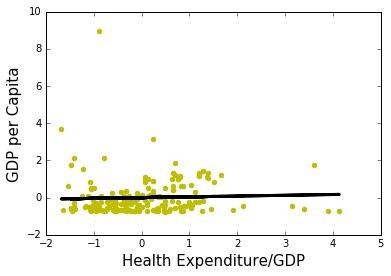

In [127]:
callLinearRegression('Health Expenditure/GDP')

Slope = [ 0.01086029], Bias = [  2.82757009e-17]
Residual sum of squares: 1.00
R^2: 0.00


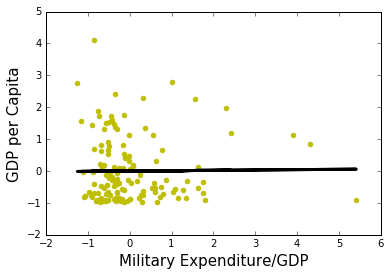

In [128]:
callLinearRegression('Military Expenditure/GDP')

Slope = [ 0.01230414], Bias = [ -3.47437816e-16]
Residual sum of squares: 1.00
R^2: 0.00


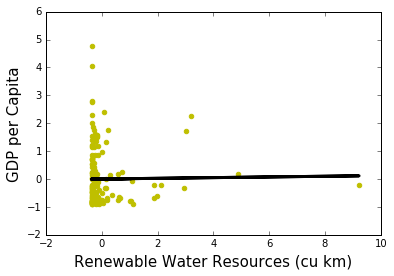

In [129]:
callLinearRegression('Renewable Water Resources (cu km)')

Slope = [ 0.18991409], Bias = [ -1.42428708e-16]
Residual sum of squares: 0.96
R^2: 0.04


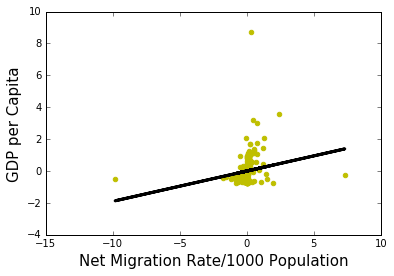

In [130]:
callLinearRegression('Net Migration Rate/1000 Population')

Slope = [-0.0402191], Bias = [  2.27005303e-16]
Residual sum of squares: 1.00
R^2: 0.00


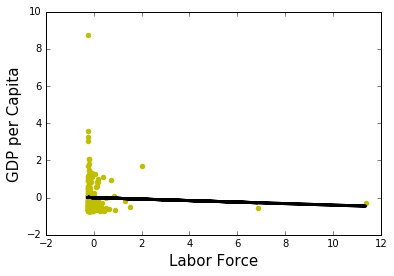

In [131]:
callLinearRegression('Labor Force')

Slope = [ 0.08612185], Bias = [  1.75090350e-16]
Residual sum of squares: 0.99
R^2: 0.01


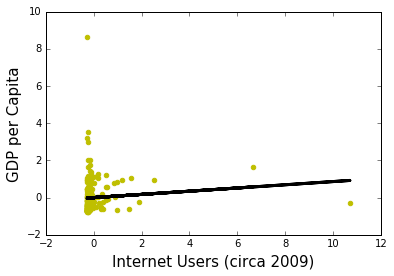

In [132]:
callLinearRegression('Internet Users (circa 2009)')

Slope = [-0.55990758], Bias = [ -5.97496008e-16]
Residual sum of squares: 0.69
R^2: 0.31


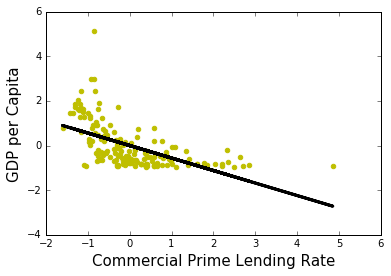

In [133]:
callLinearRegression('Commercial Prime Lending Rate')

###### The model 'Life Expectancy' vs GDP per capita has the minimum squared values error of 0.67. 
Monaco lies farthest above the forecast.This can be due to the fact that Monaco has the extremely small value of Population and since its GDP is relatively very high, therefore resulting in the exceptionally high location from the forecast. Congo lies farthest below the forecast.

In [134]:
json_hw={
    "Email": "tkausar@cs.stonybrook.edu",
    "Name": "Tanwee Kausar",
    "Q2": {
        "Negative": {
            "Attr0": "Commercial Prime Lending Rate",
            "Attr1": "Net Migration Rate/1000 Population",
            "coeff": -0.4418,
            "pValue": 0.001000
        },
        "Positive": {
            "Attr0": "Labor Force",
            "Attr1": "Population",
            "coeff": 0.9801,
            "pValue": 0.001000
        }
    },
    "Q3": {
        "Attr": "Life Expectancy",
        "SquaredError": 0.6700
    },
    "SBUID": "110937649"
}

In [135]:
with open('HW2.json','w') as outputfile:
    json.dump(json_hw,outputfile)

# Task 4 :  Scoring function to measure general social welfare

In [137]:
df_T4country=df_similarity[['Country Name']]
df_T4parameters=df_similarity[['Life Expectancy','Literacy Rate (%)','GDP (PPP) in US $','Coastline (km)','Health Expenditure/GDP','Renewable Water Resources (cu km)','Labor Force','Internet Users (circa 2009)','Population']]
df_T4parameters=df_T4parameters.astype(float)
df_T4parameters=df_T4parameters.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
#df_T4parameters.fillna(0,inplace=True)
df_T4parameters['GDP per capita']=df_T4parameters['GDP (PPP) in US $']/df_T4parameters['Population']
df_T4parameters['LaborForce per capita']=df_T4parameters['Labor Force']/df_T4parameters['Population']
del df_T4parameters['GDP (PPP) in US $']
del df_T4parameters['Labor Force']
df_T4parameters

,Life Expectancy,Literacy Rate (%),Coastline (km),Health Expenditure/GDP,Renewable Water Resources (cu km),Internet Users (circa 2009),Population,GDP per capita,LaborForce per capita
0,50.49,28.1,0.0,9.6,65.33,1000000.0,31822848.0,1423.505527,0.236057
1,77.96,96.8,362.0,6.3,41.70,1300000.0,3020209.0,9383.456575,0.363551
2,76.39,72.6,998.0,3.9,11.67,4700000.0,38813722.0,7335.034759,0.287270
4,55.29,70.4,1600.0,3.5,148.00,606700.0,19088106.0,6904.823349,0.472441
5,76.12,99.0,153.0,5.9,0.05,65000.0,91295.0,17635.138836,0.328605
6,77.51,97.9,4989.0,8.1,814.00,13694000.0,43024374.0,17920.074793,0.402563
7,74.12,99.6,0.0,4.3,7.77,208200.0,3060631.0,6733.905525,0.455462
8,82.07,99.0,25760.0,9.0,492.00,15810000.0,22507617.0,44353.873624,0.552702
9,80.17,98.0,0.0,10.6,77.70,6143000.0,8223062.0,43900.921579,0.454454
10,71.91,99.8,0.0,5.2,34.68,2420000.0,9686210.0,10602.702192,0.483161


In [138]:
#calculating z-score of all parameters
del df_T4parameters['Population']
df_T4parameters_Z = (df_T4parameters - df_T4parameters.mean())/df_T4parameters.std(ddof=0)
df_T4parameters_Z

,Life Expectancy,Literacy Rate (%),Coastline (km),Health Expenditure/GDP,Renewable Water Resources (cu km),Internet Users (circa 2009),GDP per capita,LaborForce per capita
0,-2.236123,-3.079479,-0.245607,0.948398,-0.293720,-0.258495,-0.847682,-1.954504
1,0.823184,0.666537,-0.224230,-0.185851,-0.320876,-0.250501,-0.363773,-0.719416
2,0.648334,-0.653020,-0.186672,-1.010760,-0.355386,-0.159903,-0.488302,-1.458386
4,-1.701551,-0.772980,-0.151122,-1.148245,-0.198717,-0.268975,-0.514456,0.335444
5,0.618265,0.786497,-0.236572,-0.323336,-0.368739,-0.283409,0.137872,-1.057951
6,0.773068,0.726517,0.049009,0.432830,0.566644,0.079753,0.155195,-0.341495
7,0.395527,0.819213,-0.245607,-0.873275,-0.359868,-0.279593,-0.524847,0.170960
8,1.280910,0.786497,1.275603,0.742171,0.196605,0.136137,1.762186,1.112965
9,1.069309,0.731970,-0.245607,1.292110,-0.279505,-0.121453,1.734649,0.161195
10,0.149401,0.830119,-0.245607,-0.563934,-0.328943,-0.220657,-0.289651,0.439296


##### Taking scoring/ranking function as the sum of the Z-values of the following parameters :-
1. GDP per Capita, 
2. Life Expectancy,
3. Literacy Rate (%), 
4. Coastline (km), 
5. Health Expenditure/GDP ,
6. Renewable Water Resources (cu km),
7. Labor Force Per Capita ,
8. Internet Users (circa 2009). 

In [139]:
df_T4parameters_sum=df_T4parameters_Z.sum(axis=1)
df_Score=pd.concat([df_T4country['Country Name'],df_T4parameters_sum],axis=1)
df_Score.columns=['Country Name','Z-score sum']
df_Score

,Country Name,Z-score sum
0,Afghanistan,-7.967212
1,Albania,-0.574925
2,Algeria,-3.664095
3,Andorra,NaN
4,Angola,-4.420601
5,Antigua and Barbuda,-0.727374
6,Argentina,2.441520
7,Armenia,-0.897490
8,Australia,7.293073
9,Austria,4.342667


In [140]:
df_Score=df_Score.sort_values(by='Z-score sum',axis=0,ascending=False)
df_Score.head(170)

,Country Name,Z-score sum
31,Canada,21.388190
187,United States,18.654074
35,China,15.230351
23,Brazil,13.034492
84,Japan,9.260895
143,Russia,9.185361
8,Australia,7.293073
130,Norway,7.240052
63,Germany,7.036681
169,Switzerland,6.427489


##### Social welfare of a nation can be measured by the parameters - GDP per Capita, Life Expectancy,Literacy Rate (%), Coastline (km), Health Expenditure/GDP ,Renewable Water Resources (cu km),Labor Force Per Capita ,Internet Users (circa 2009). Reason for taking these into account is the following :-

GDP per capita indicates economic growth. Greater life expectancy denotes better health of people in the nation. Coastline generally indicates the tourism economy. Health expenditure/GDP signifies how much expenditure one can avail for health from one's income. Renewable water resources depicts how developed the nation is as generally nations involved in scientific developments are more involved in finding renewable sources. Labor force per capita indicates how many people among the total population are contributing to the economy. Hence, higher the value, higher the rank of the nation should be. Internet users' count depicts the social awareness among the people . Hence, taking the above parameters to detremine the score function looks valid.

As per the above scoring function, countries like Canada, USA, China, Brazil, Japan,Norway, Germany comes higher in the social ranking. Countries like Benin ,Central African Republic,Burkina Faso,Afghanistan,Chad,Mali,Niger are among the worst ranked countries. There are some countries for which values of few parameters were not found, hence those resulted in NaN

Around 11-12 countries in the top 20 match with the countries in the top 20 given by Social Progress Index of 2015 report [0]. And around 13 countries in the bottom 20 ranks of the above scoring function matches with the last 20 ranked nations at [0]. Hence, the above defined scoring fucntion looks good in determining the rank of a nation

[0] https://en.wikipedia.org/wiki/List_of_countries_by_Social_Progress_Index

# Task 5 Defining meaningful distance function to measure how similar/difference pairs of countries are

In [141]:
#Taking similarity function as function of Popluation, Life expectancy, Literacy rate, GDP
df_similarity

,Country Name,Population,Life Expectancy,Literacy Rate (%),GDP (PPP) in US $,Area (sq km),Coastline (km),Health Expenditure/GDP,Renewable Water Resources (cu km),Net Migration Rate/1000 Population,Labor Force,Internet Users (circa 2009)
0,Afghanistan,31822848,50.49,28.1,45300000000,652230.0,0.0,9.6,65.33,-1.83,7512000,1000000
1,Albania,3020209,77.96,96.8,28340000000,28748.0,362.0,6.3,41.7,-3.31,1098000,1300000
2,Algeria,38813722,76.39,72.6,284700000000,2381741.0,998.0,3.9,11.67,-0.93,11150000,4700000
3,Andorra,85458,82.65,100,3163000000,468.0,0.0,7.2,NaN,0,36060,67100
4,Angola,19088106,55.29,70.4,131800000000,1246700.0,1600.0,3.5,148,0.47,9018000,606700
5,Antigua and Barbuda,91295,76.12,99,1610000000,442.6,153.0,5.9,0.05,2.23,30000,65000
6,Argentina,43024374,77.51,97.9,771000000000,2780400.0,4989.0,8.1,814,0,17320000,13694000
7,Armenia,3060631,74.12,99.6,20610000000,29743.0,0.0,4.3,7.77,-5.88,1394000,208200
8,Australia,22507617,82.07,99,998300000000,7741220.0,25760.0,9,492,5.74,12440000,15810000
9,Austria,8223062,80.17,98,361000000000,83871.0,0.0,10.6,77.7,1.76,3737000,6143000


In [142]:
df_country=df_similarity[['Country Name']]
df_parameters=df_similarity[['Population','Life Expectancy','Literacy Rate (%)','GDP (PPP) in US $','Area (sq km)','Coastline (km)','Health Expenditure/GDP','Renewable Water Resources (cu km)','Net Migration Rate/1000 Population','Labor Force','Internet Users (circa 2009)']]
df_parameters=df_parameters.astype(float)
#df_parameters=df_parameters.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
df_parameters.fillna(0,inplace=True)
df_parameters['GDP per capita']=df_parameters['GDP (PPP) in US $']/df_parameters['Population']
df_parameters

,Population,Life Expectancy,Literacy Rate (%),GDP (PPP) in US $,Area (sq km),Coastline (km),Health Expenditure/GDP,Renewable Water Resources (cu km),Net Migration Rate/1000 Population,Labor Force,Internet Users (circa 2009),GDP per capita
0,31822848.0,50.49,28.1,4.530000e+10,652230.0,0.0,9.6,65.33,-1.83,7512000.0,1000000.0,1423.505527
1,3020209.0,77.96,96.8,2.834000e+10,28748.0,362.0,6.3,41.70,-3.31,1098000.0,1300000.0,9383.456575
2,38813722.0,76.39,72.6,2.847000e+11,2381741.0,998.0,3.9,11.67,-0.93,11150000.0,4700000.0,7335.034759
3,85458.0,82.65,100.0,3.163000e+09,468.0,0.0,7.2,0.00,0.00,36060.0,67100.0,37012.333544
4,19088106.0,55.29,70.4,1.318000e+11,1246700.0,1600.0,3.5,148.00,0.47,9018000.0,606700.0,6904.823349
5,91295.0,76.12,99.0,1.610000e+09,442.6,153.0,5.9,0.05,2.23,30000.0,65000.0,17635.138836
6,43024374.0,77.51,97.9,7.710000e+11,2780400.0,4989.0,8.1,814.00,0.00,17320000.0,13694000.0,17920.074793
7,3060631.0,74.12,99.6,2.061000e+10,29743.0,0.0,4.3,7.77,-5.88,1394000.0,208200.0,6733.905525
8,22507617.0,82.07,99.0,9.983000e+11,7741220.0,25760.0,9.0,492.00,5.74,12440000.0,15810000.0,44353.873624
9,8223062.0,80.17,98.0,3.610000e+11,83871.0,0.0,10.6,77.70,1.76,3737000.0,6143000.0,43900.921579


In [143]:
#calculating z-score of all parameters
df_parameters_Z = (df_parameters - df_parameters.mean())/df_parameters.std(ddof=0)
df_parameters_Z

,Population,Life Expectancy,Literacy Rate (%),GDP (PPP) in US $,Area (sq km),Coastline (km),Health Expenditure/GDP,Renewable Water Resources (cu km),Net Migration Rate/1000 Population,Labor Force,Internet Users (circa 2009),GDP per capita
0,-0.033376,-2.267040,-2.524438,-0.240901,-0.020432,-0.243336,0.884830,-0.257027,-0.130066,-0.135248,-0.234900,-0.693973
1,-0.246695,0.819260,0.626866,-0.251251,-0.347626,-0.220577,-0.124165,-0.286233,-0.260004,-0.229110,-0.226270,-0.321292
2,0.018399,0.642868,-0.483200,-0.094805,0.887190,-0.180591,-0.857979,-0.323350,-0.051051,-0.082010,-0.128459,-0.417198
3,-0.268431,1.346190,0.773652,-0.266615,-0.362467,-0.243336,0.151015,-0.337774,0.030599,-0.244650,-0.261738,0.972281
4,-0.127693,-1.727752,-0.584116,-0.188113,0.291537,-0.142742,-0.980281,-0.154848,0.071863,-0.113209,-0.246215,-0.437340
5,-0.268387,0.612533,0.727781,-0.267563,-0.362480,-0.233717,-0.246467,-0.337712,0.226383,-0.244739,-0.261798,0.065049
6,0.049584,0.768702,0.677324,0.201964,1.096400,0.070328,0.426196,0.668317,0.030599,0.008281,0.130279,0.078389
7,-0.246396,0.387830,0.755303,-0.255968,-0.347104,-0.243336,-0.735677,-0.328170,-0.485638,-0.224778,-0.257679,-0.445342
8,-0.102367,1.281026,0.727781,0.340676,3.699764,1.376225,0.701376,0.270330,0.534545,-0.063132,0.191152,1.316009
9,-0.208162,1.067558,0.681911,-0.048242,-0.318698,-0.243336,1.190585,-0.241738,0.185119,-0.190491,-0.086947,1.294802


###### Taking distance function as sum of the Z-scores of the following parameters :-
1. Life Expectancy
2. Literacy Rate (%)
3. GDP (PPP) in US $
4. Area (sq km)
5. Coastline (km)
6. Health Expenditure/GDP
7. Renewable Water Resources (cu km)
8. Net Migration Rate/1000 Population
9. Labor Force
10. Internet Users (circa 2009)
11. GDP per capita
12. Population

In [144]:
df_distanceFnValues=df_parameters_Z.sum(axis=1)
#Calculating dustance function values for every country

In [145]:
df_Similar=pd.concat([df_country['Country Name'],df_distanceFnValues],axis=1)
df_Similar.columns=['Country Name','Z-score sum']
#df_Similar

##### Two countries can be compared based upon their economic and social development performances. And these can be judged by factors like GDP/per capita or how much a country spends its economy on Health expenditure or renewable resources. We can also measure similarity in terms of physical appearance of the countries on map. Hence, to measure similarity/dissimilarity, taking the following features into account:
'Population' 
'Life Expectancy',
'Literacy Rate (%)',
'GDP (PPP) in US' ,
'Area (sq km)',
'Coastline (km)',
'Health Expenditure/GDP',
'Renewable Water Resources (cu km)',
'Net Migration Rate/1000 Population',
'Labor Force',
'Internet Users (circa 2009)'
For instance, we have countries like China and India that can be said to be similar based upon their population. Similar is the case with GDP per capita 

In [146]:
df_Similar=df_Similar.sort_values(by='Z-score sum',axis=0,ascending=False)
df_Similar.head(190)

,Country Name,Z-score sum
35,China,48.838751
187,United States,37.189353
31,Canada,26.925590
76,India,20.975987
23,Brazil,20.968915
143,Russia,20.617331
84,Japan,12.333176
8,Australia,10.273386
116,Monaco,9.186273
77,Indonesia,8.729466


In [147]:
df_neighbor=df_Similar.values
df_neighbor=pd.DataFrame(df_neighbor)
df_neighbor['Nearest_Neighbor']=df_neighbor[1]-df_neighbor[1]
df_neighbor['Farthest_Neighbor']=df_neighbor[1]-df_neighbor[1]
for row in range(1,df_neighbor[0].size-1):
#     print ('Calculating min diff in score function for ',df_neighbor[0][row])
    diff_abv=df_neighbor[1][row-1]-df_neighbor[1][row]
    diff_bel=df_neighbor[1][row]-df_neighbor[1][row+1]
    #calculating difference of the current row with the farthest countries at the top and bottom of the sorted table
    diff_abv_far=df_neighbor[1][0]-df_neighbor[1][row]
    diff_bel_far=df_neighbor[1][row]-df_neighbor[1][df_neighbor[0].size-1]
    if(diff_abv>diff_bel):
        df_neighbor['Nearest_Neighbor'][row]=df_neighbor[0][row-1]
    else:
        df_neighbor['Nearest_Neighbor'][row]=df_neighbor[0][row+1]
    if(diff_abv_far>diff_bel_far):
        df_neighbor['Farthest_Neighbor'][row]=df_neighbor[0][0]
    else:
        df_neighbor['Farthest_Neighbor'][row]=df_neighbor[0][df_neighbor[0].size-1]


In [148]:
df_temp={'Country_Name':df_neighbor[0].values,
         'Nearest_Neighbor':df_neighbor['Nearest_Neighbor'].values,
         'Farthest_Neighbor':df_neighbor['Farthest_Neighbor'].values
         }
df_neighbor=pd.DataFrame(df_temp)
df_neighbor=df_neighbor[df_neighbor.Nearest_Neighbor != 0]
df_neighbor

,Country_Name,Farthest_Neighbor,Nearest_Neighbor
1,United States,Syria,China
2,Canada,Syria,United States
3,India,Syria,Canada
4,Brazil,Syria,Russia
5,Russia,Syria,Japan
6,Japan,China,Russia
7,Australia,China,Japan
8,Monaco,China,Australia
9,Indonesia,China,Germany
10,Germany,China,France


##### The above table shows the nearest and farthest neighbor of every nation.
Let's analyse the nearest neighbours of USA .These are China and Canada. Using the statistics given at [1],China has 4.5 times the population of USA. GDP per capita of China is around 0.18 times of USA. However, Literacy rate and Life expectancy are mostly similar. So , in some parameters, we can say these are similar to each other.
Checking Japan's nearest neighbour 'Australia' at [0] , the human development index is quite comparable. As far as farthest countries are concerned, Syria and USA are definitely farther and the above-mentioned distance function depicts the same.

So, this function seems to hold good for many country pairs.

The most surprising pair is Monaco and Germany. Even though Monaco is quite a small state, it's similar to Germany which is quite a big state.

It goofs up with the pair Germany and Indonesia. Apart from litercay rate, nothing much matches here. 

[1] http://www.aneki.com/comparison.php